In [ ]:
from google.colab import drive
drive.mount(r'/content/drive')

In [ ]:
!pip install livelossplot

In [ ]:
from keras.preprocessing.image import image_dataset_from_directory
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import tensorflow as tf
from glob import glob
import numpy as np
import cv2
import os

In [ ]:
folders = glob(r"/content/drive/MyDrive/My_DeepLerning_Projects/Datasets/Pneumonia_Diagnosis/chest_xray/*")
folders

['/content/drive/MyDrive/My_DeepLerning_Projects/Datasets/Pneumonia_Diagnosis/chest_xray/val',
 '/content/drive/MyDrive/My_DeepLerning_Projects/Datasets/Pneumonia_Diagnosis/chest_xray/test',
 '/content/drive/MyDrive/My_DeepLerning_Projects/Datasets/Pneumonia_Diagnosis/chest_xray/train']

(1456, 2000, 3)


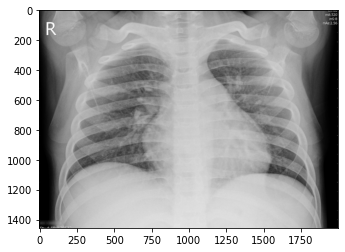

In [ ]:
img = cv2.imread(r"/content/drive/MyDrive/My_DeepLerning_Projects/Datasets/Pneumonia_Diagnosis/chest_xray/test/PNEUMONIA/person21_virus_53.jpeg")
plt.imshow(img)
print(img.shape)

In [ ]:
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

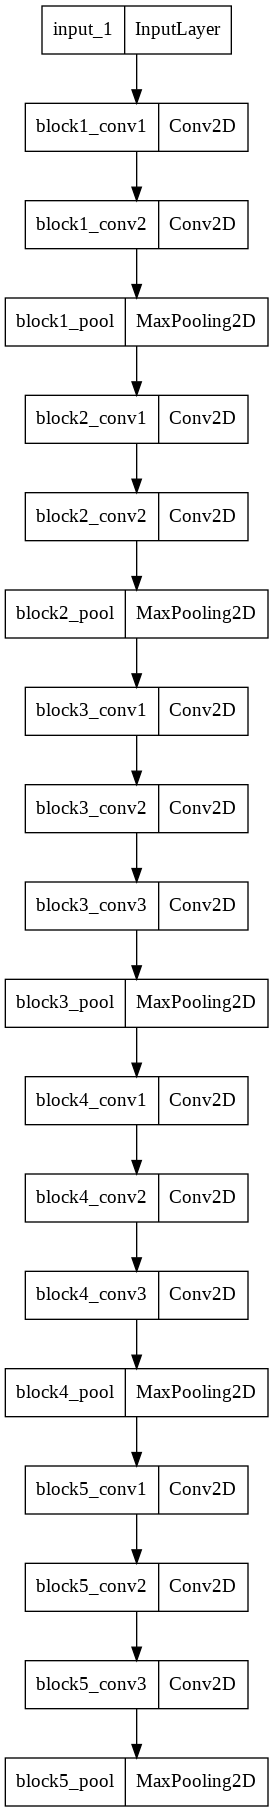

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(conv_base,to_file="VGG16.png")

Let's build network

In [ ]:
from keras import models
from keras import layers
from keras.layers import Dense, Flatten, Dropout
from keras import Model
# network = Model(conv_base.input,conv_base.layers[-1].output)
###
# Decsion Layer
headmodel = conv_base.output
headmodel = layers.Flatten()(headmodel)
headmodel = layers.Dense(units=128,activation='relu')(headmodel)
headmodel = layers.Dropout(0.5)(headmodel)# Add Penalty
headmodel = layers.Dense(units=128,activation='relu')(headmodel)
headmodel = layers.Dropout(0.5)(headmodel) # Add Penalty
headmodel = layers.Dense(units=1 , activation='sigmoid')(headmodel)

network = Model (inputs = conv_base.input,outputs = headmodel)
###
#network = models.Sequential()
# Add conv_base for network
# network.add(conv_base)
# network.add(layers.Flatten())
# network.add(layers.Dense(units=256,activation='relu'))
# network.add(layers.Dropout(0.5))# Add Penalty
# network.add(layers.Dense(units=128,activation='relu'))
# network.add(layers.Dropout(0.5))
# network.add(layers.Dense(units=1 , activation='sigmoid'))

In [ ]:
network.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

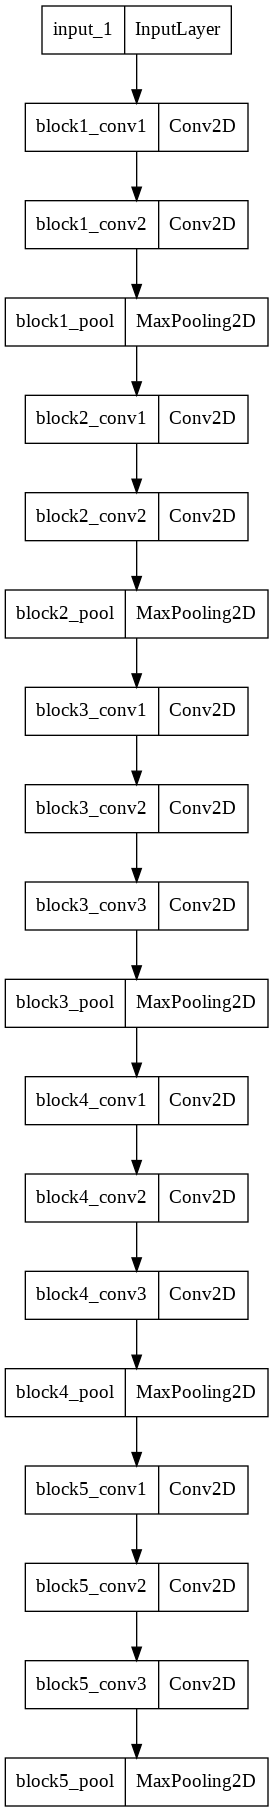

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(conv_base,to_file=r"/content/drive/MyDrive/Model/Model_plot.png")

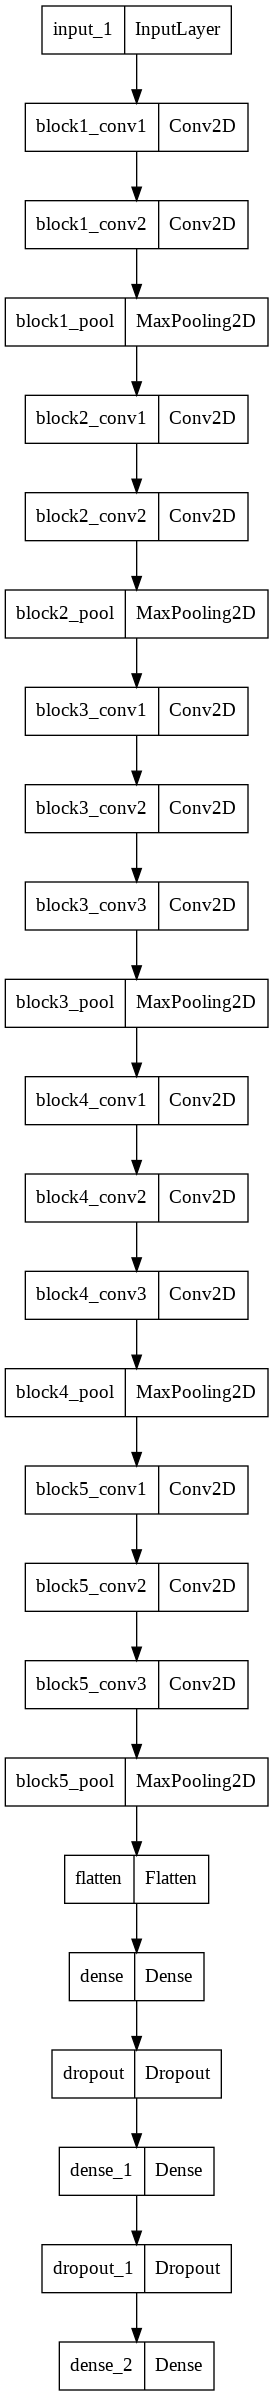

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(network,to_file=r"/content/drive/MyDrive/Model/Network_plot.png")

Let's Freeze layers from conv_base

In [ ]:
# conv_base.trainable = False

In [ ]:
# conv_base.trainable = False
for layer in conv_base.layers:
  layer.trainable = False

In [ ]:
network.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

__loop over the layers in the model and show which ones are trainable or not__

In [ ]:
for layer in conv_base.layers:
  print("{}: {}".format(layer,layer.trainable))


<keras.engine.input_layer.InputLayer object at 0x7f30f1fc57d0>: False
<keras.layers.convolutional.Conv2D object at 0x7f30eae08510>: False
<keras.layers.convolutional.Conv2D object at 0x7f30df0eb190>: False
<keras.layers.pooling.MaxPooling2D object at 0x7f30df0eb410>: False
<keras.layers.convolutional.Conv2D object at 0x7f30df04c9d0>: False
<keras.layers.convolutional.Conv2D object at 0x7f30df04c810>: False
<keras.layers.pooling.MaxPooling2D object at 0x7f30d05bc2d0>: False
<keras.layers.convolutional.Conv2D object at 0x7f30df06cc10>: False
<keras.layers.convolutional.Conv2D object at 0x7f30d05c5290>: False
<keras.layers.convolutional.Conv2D object at 0x7f30df06cdd0>: False
<keras.layers.pooling.MaxPooling2D object at 0x7f30d05cef10>: False
<keras.layers.convolutional.Conv2D object at 0x7f30d0556350>: False
<keras.layers.convolutional.Conv2D object at 0x7f30d055ddd0>: False
<keras.layers.convolutional.Conv2D object at 0x7f30d05ce710>: False
<keras.layers.pooling.MaxPooling2D object at 0

__Let's make Data Augmintation for Dataset__

In [ ]:
train_dir_path = r'/content/drive/MyDrive/My_DeepLerning_Projects/Datasets/Pneumonia_Diagnosis/chest_xray/train'
test_dir_path  = r'/content/drive/MyDrive/My_DeepLerning_Projects/Datasets/Pneumonia_Diagnosis/chest_xray/test'

In [ ]:
batch_size = 16

In [ ]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(
    # rescale=1/255.0,
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
)

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_gen.flow_from_directory(
    # This is the target directory for train images
    train_dir_path,
    # All images will be resized to 224x224
    target_size=(224,224),
    batch_size=batch_size,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode ='binary' ,
    shuffle=True
)

validation_generator = test_gen.flow_from_directory(
    # This is the target directory for test images
    test_dir_path,
     # All images will be resized to 224x224
    target_size=(224,224),
    batch_size=batch_size,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode ='binary' ,
    shuffle=True
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
validation_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
validation_generator.samples

624

In [ ]:
train_generator.samples

5216

__Let's Compile Model__

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr =2e-5,momentum=0.9)
network.compile(optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
validation

In [ ]:
train_generator.samples//batch_size

326

In [ ]:
from livelossplot import PlotLossesKeras
Model_trainer  = network.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size,
    epochs=10,
    verbose=2
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
326/326 - 311s - loss: 1.1450 - accuracy: 0.7504 - val_loss: 0.4910 - val_accuracy: 0.7708 - 311s/epoch - 954ms/step
Epoch 2/10
326/326 - 123s - loss: 0.4647 - accuracy: 0.8018 - val_loss: 0.4610 - val_accuracy: 0.7788 - 123s/epoch - 377ms/step
Epoch 3/10
326/326 - 126s - loss: 0.3859 - accuracy: 0.8229 - val_loss: 0.4972 - val_accuracy: 0.7708 - 126s/epoch - 387ms/step
Epoch 4/10
326/326 - 125s - loss: 0.3572 - accuracy: 0.8368 - val_loss: 0.4039 - val_accuracy: 0.8221 - 125s/epoch - 384ms/step
Epoch 5/10
326/326 - 122s - loss: 0.3477 - accuracy: 0.8376 - val_loss: 0.4181 - val_accuracy: 0.8205 - 122s/epoch - 373ms/step
Epoch 6/10
326/326 - 122s - loss: 0.3169 - accuracy: 0.8526 - val_loss: 0.4069 - val_accuracy: 0.8285 - 122s/epoch - 373ms/step
Epoch 7/10
326/326 - 122s - loss: 0.2993 - accuracy: 0.8668 - val_loss: 0.3781 - val_accuracy: 0.8574 - 122s/epoch - 375ms/step
Epoch 8/10
326/326 - 121s - loss: 0.2940 - accuracy: 0.8760 - val_loss: 0.4250 - val_accuracy: 0.8349 - 

In [ ]:
# # Fit Model
# from livelossplot import PlotLossesKeras
# Model_trainer = network.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples//batch_size,
#     epochs=10,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples//batch_size,
#     callbacks=[PlotLossesKeras()]
# )

__NOw We need to unfreeze last block in VGG16 to _Fin tune___

In [ ]:
for layer in conv_base.layers[15:]:
  layer.trainable = True

In [ ]:
c=1
for layer in conv_base.layers:
  print(c," {} ,{}".format(layer,layer.trainable))
  c+=1

1  <keras.engine.input_layer.InputLayer object at 0x7f30f1fc57d0> ,False
2  <keras.layers.convolutional.Conv2D object at 0x7f30eae08510> ,False
3  <keras.layers.convolutional.Conv2D object at 0x7f30df0eb190> ,False
4  <keras.layers.pooling.MaxPooling2D object at 0x7f30df0eb410> ,False
5  <keras.layers.convolutional.Conv2D object at 0x7f30df04c9d0> ,False
6  <keras.layers.convolutional.Conv2D object at 0x7f30df04c810> ,False
7  <keras.layers.pooling.MaxPooling2D object at 0x7f30d05bc2d0> ,False
8  <keras.layers.convolutional.Conv2D object at 0x7f30df06cc10> ,False
9  <keras.layers.convolutional.Conv2D object at 0x7f30d05c5290> ,False
10  <keras.layers.convolutional.Conv2D object at 0x7f30df06cdd0> ,False
11  <keras.layers.pooling.MaxPooling2D object at 0x7f30d05cef10> ,False
12  <keras.layers.convolutional.Conv2D object at 0x7f30d0556350> ,False
13  <keras.layers.convolutional.Conv2D object at 0x7f30d055ddd0> ,False
14  <keras.layers.convolutional.Conv2D object at 0x7f30d05ce710> ,False

In [ ]:
# Recompile Model with differnet lerning rate
from tensorflow.keras.optimizers import SGD
opt = SGD(lr =1e-5,momentum=0.9)
network.compile(optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# Re Fit Model
Model_trainer  = network.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size,
    epochs=25,
    verbose=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
326/326 - 134s - loss: 0.2548 - accuracy: 0.8953 - val_loss: 0.3628 - val_accuracy: 0.8638 - 134s/epoch - 412ms/step
Epoch 2/25
326/326 - 125s - loss: 0.2421 - accuracy: 0.8986 - val_loss: 0.3601 - val_accuracy: 0.8718 - 125s/epoch - 383ms/step
Epoch 3/25
326/326 - 126s - loss: 0.2349 - accuracy: 0.9009 - val_loss: 0.3522 - val_accuracy: 0.8862 - 126s/epoch - 386ms/step
Epoch 4/25
326/326 - 125s - loss: 0.2383 - accuracy: 0.9082 - val_loss: 0.3367 - val_accuracy: 0.8782 - 125s/epoch - 382ms/step
Epoch 5/25
326/326 - 124s - loss: 0.2236 - accuracy: 0.9133 - val_loss: 0.2881 - val_accuracy: 0.9022 - 124s/epoch - 381ms/step
Epoch 6/25
326/326 - 123s - loss: 0.2090 - accuracy: 0.9162 - val_loss: 0.3175 - val_accuracy: 0.8894 - 123s/epoch - 378ms/step
Epoch 7/25
326/326 - 124s - loss: 0.1839 - accuracy: 0.9254 - val_loss: 0.2924 - val_accuracy: 0.9022 - 124s/epoch - 381ms/step
Epoch 8/25
326/326 - 123s - loss: 0.2000 - accuracy: 0.9210 - val_loss: 0.3283 - val_accuracy: 0.8894 - 

In [ ]:
loss,accuracy = network.evaluate(validation_generator,verbose=2)

39/39 - 7s - loss: 0.2526 - accuracy: 0.9247 - 7s/epoch - 187ms/step


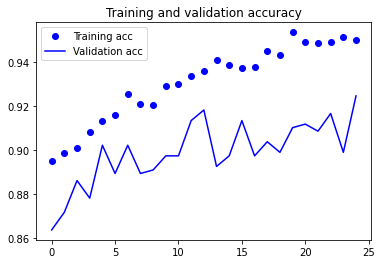

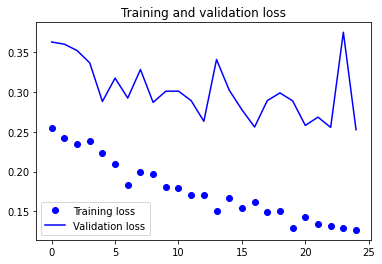

In [ ]:
from matplotlib import pyplot as plt
acc = Model_trainer.history['accuracy']
val_acc = Model_trainer.history['val_accuracy']
loss = Model_trainer.history['loss']
val_loss = Model_trainer.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig(r"/content/drive/MyDrive/Model/Training_validation_accuracy.png")
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig(r"/content/drive/MyDrive/Model/Training_validation_loss.png")

plt.show()

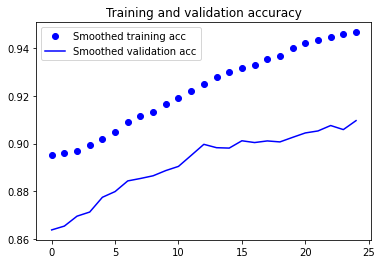

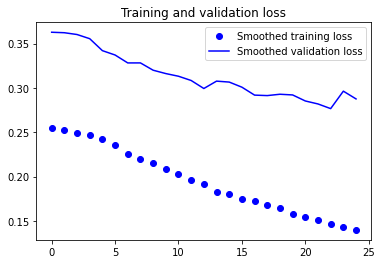

In [ ]:
acc = Model_trainer.history['accuracy']
val_acc = Model_trainer.history['val_accuracy']
loss = Model_trainer.history['loss']
val_loss = Model_trainer.history['val_loss']
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig(r"/content/drive/MyDrive/Model/Training_validation_accuracy1.png")
plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig(r"/content/drive/MyDrive/Model/Training_validation_loss1.png")

plt.show()

In [ ]:
# save model
network.save(r'/content/drive/MyDrive/Model/Pneumonia_Diagnos3.h5')

In [ ]:
from keras.models import load_model
model = load_model(r'/content/drive/MyDrive/Model/Pneumonia_Diagnos3.h5')

[[0.8065704]]
PNEUMONIA


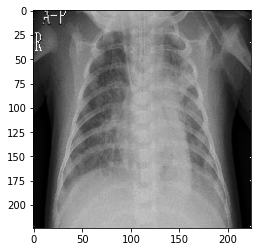

[[0.46241492]]
NORMAL


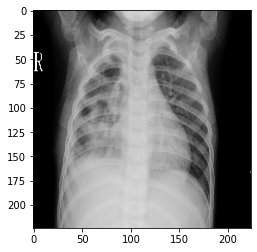

[[0.3936947]]
NORMAL


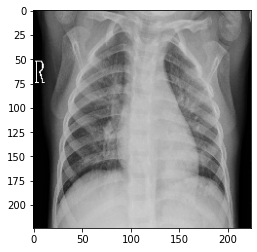

[[0.83444536]]
PNEUMONIA


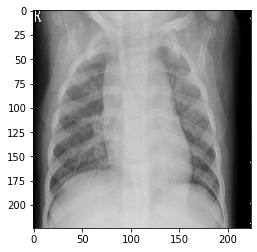

[[0.99968946]]
PNEUMONIA


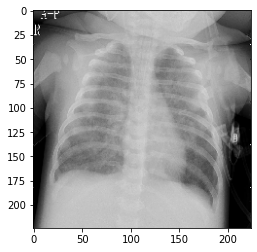

[[0.94131446]]
PNEUMONIA


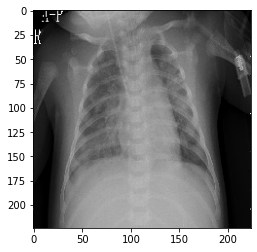

[[0.9996433]]
PNEUMONIA


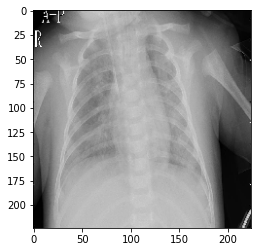

[[0.9972403]]
PNEUMONIA


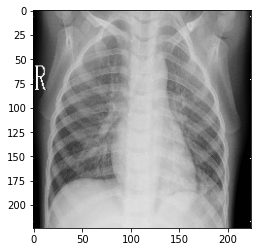

In [ ]:
import numpy as np
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array,load_img

vaildation_dir = r'/content/drive/MyDrive/Final_Model/val/PNEUMONIA'

for i in os.listdir(vaildation_dir):
    # print(i)
    img = load_img(vaildation_dir+'//'+i,target_size=(224,224))
    plt.imshow(img)

    img = img_to_array(img)
    # img = img.astype('float')
    # img = img/255

    img = img.reshape((1,)+img.shape)
    # x = np.expand_dims(img,0)

    img = preprocess_input(img)

    pridict_value = model.predict(img)

    np.vstack([pridict_value])
    print(np.vstack([pridict_value]))

    if np.round(pridict_value[0][0])==0:
      print("NORMAL")
    else:
      print("PNEUMONIA")
    plt.show()
